# Diffusion-TS Tutorial

## Diffusion-TS: Interpretable Diffusion for General Time Series Generation

This notebook describes the user-guide of a time-series synthetic data generation application using Diffusion-TS framework.

## Necessary packages and functions call

In [1]:
import os
import torch
import numpy as np

from engine.solver import Trainer
from Utils.metric_utils import visualization
from Data.build_dataloader import build_dataloader
from Utils.io_utils import load_yaml_config, instantiate_from_config
from Models.interpretable_diffusion.model_utils import unnormalize_to_zero_to_one

## Setting and Training

### Build dataset and settings

In [2]:
class Args_Example:
    def __init__(self) -> None:
        self.config_path = './Config/energy.yaml'
        self.save_dir = './energy'
        self.gpu = 0
        os.makedirs(self.save_dir, exist_ok=True)

args =  Args_Example()
configs = load_yaml_config(args.config_path)
device = torch.device(f'cuda:{args.gpu}' if torch.cuda.is_available() else 'cpu')

dl_info = build_dataloader(configs, args)
model = instantiate_from_config(configs['model']).to(device)
trainer = Trainer(config=configs, args=args, model=model, dataloader=dl_info)

### Training models

In [ ]:
trainer.train()

  0%|          | 0/25000 [00:00<?, ?it/s]

D:\Anaconda\envs\myenv\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


## Inference and Visualizations

### Sampling

In [65]:
dataset = dl_info['dataset']
seq_length, feature_dim = dataset.window, dataset.var_num
#ori_data = np.load(os.path.join(dataset.dir, f"sine_ground_truth_{seq_length}_train.npy"))
dataset_name="mahu"
ori_data = np.load(os.path.join(dataset.dir, f"{dataset_name}_norm_truth_{seq_length}_train.npy"))  # Uncomment the line if dataset other than Sine is used.
ori_data1 = np.load(os.path.join(dataset.dir, f"{dataset_name}_ground_truth_{seq_length}_train.npy")) 
fake_data = trainer.sample(num=len(dataset), size_every=1024, shape=[seq_length, feature_dim])
if dataset.auto_norm:
    fake_data = unnormalize_to_zero_to_one(fake_data)
    np.save(os.path.join(args.save_dir, f'ddpm_fake_mahu.npy'), fake_data)
    fake_data1 = dataset.scaler.inverse_transform(fake_data.reshape(-1, fake_data.shape[-1])).reshape(fake_data.shape)
    np.save(os.path.join(args.save_dir, f'ddpm_fake_mahu1.npy'), fake_data1)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

### Visualization

We visualize the original and synthetic data distributions using PCA, tSNE and Density analysis.

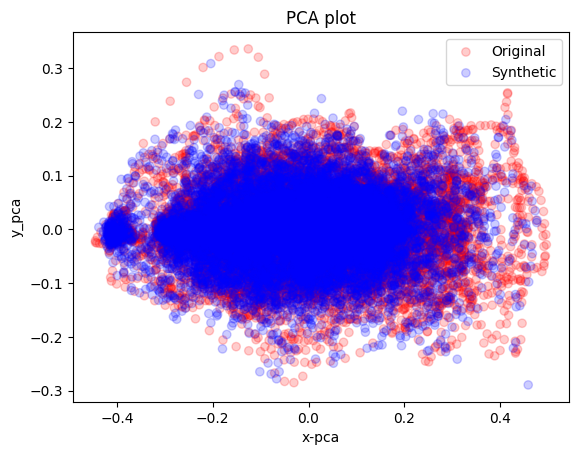

13977


In [69]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='pca', compare=ori_data.shape[0])
print(ori_data.shape[0])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 27954 samples in 0.000s...
[t-SNE] Computed neighbors for 27954 samples in 0.298s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27954
[t-SNE] Computed conditional probabilities for sample 2000 / 27954
[t-SNE] Computed conditional probabilities for sample 3000 / 27954
[t-SNE] Computed conditional probabilities for sample 4000 / 27954
[t-SNE] Computed conditional probabilities for sample 5000 / 27954
[t-SNE] Computed conditional probabilities for sample 6000 / 27954
[t-SNE] Computed conditional probabilities for sample 7000 / 27954
[t-SNE] Computed conditional probabilities for sample 8000 / 27954
[t-SNE] Computed conditional probabilities for sample 9000 / 27954
[t-SNE] Computed conditional probabilities for sample 10000 / 27954
[t-SNE] Computed conditional probabilities for sample 11000 / 27954
[t-SNE] Computed conditional probabilities for sample 12000 / 27954
[t-SNE] Computed conditional probabilities for sa

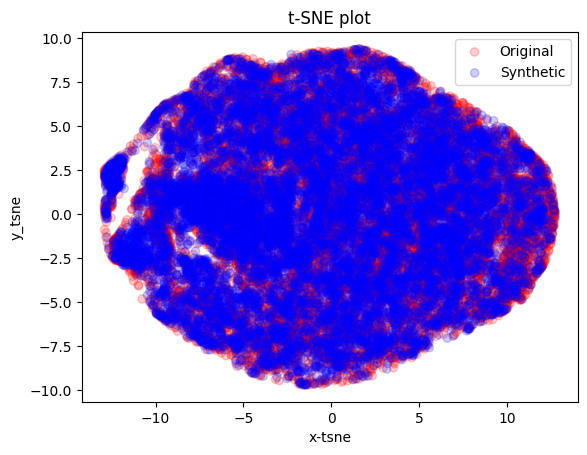

In [70]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='tsne', compare=ori_data.shape[0])

F:\Research\Code\Diffusion-TS-main\Utils\metric_utils.py:157: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prep_data, hist=False, kde=True, kde_kws={'linewidth': 5}, label='Original', color="red")
F:\Research\Code\Diffusion-TS-main\Utils\metric_utils.py:158: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

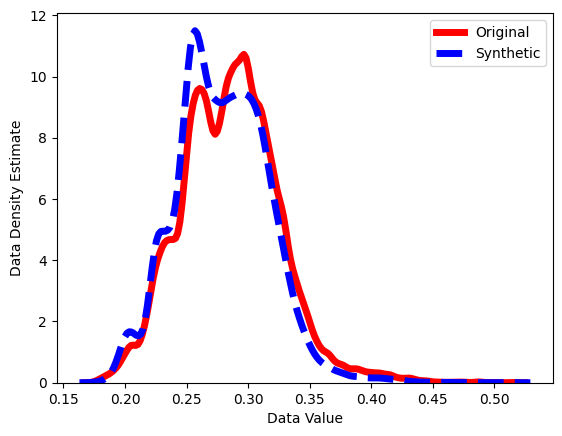

In [71]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='kernel', compare=ori_data.shape[0])